# 2.3) KNN vs SVM vs Random Forest (sklearn)
#### Confusion matrix and (used classifier’s signature in the report??????)

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

### Confusion matrix
#### Written about confusion matrix on the sklearn documentation: 
Example of confusion matrix usage to evaluate the quality of the output of a classifier on the iris data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.


(1797, 64)


<Figure size 432x288 with 0 Axes>

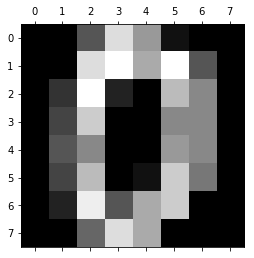

In [4]:
digits = load_digits()
# The first picture (row) is for example on the form:


print(digits.data.shape)

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [5]:
# X and Y from the dataset:
X = digits.data
y = digits.target

In [6]:
# Splitting the data into test and train:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
print("X_train")
print(X_train)
print("y_train")
print(y_train)

X_train
[[ 0.  0.  1. ...  1.  0.  0.]
 [ 0.  0.  6. ... 12.  1.  0.]
 [ 0.  0.  9. ... 15.  6.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  5. ... 11.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
y_train
[1 3 3 ... 4 8 4]


## kNN: - classifier’s signature????

In [8]:
X_train.shape

(1347, 64)

In [9]:
# Reshaping the dataset for it to work with the "fit" function:
nsamples, nx = X_train.shape
d2_train_dataset = X_train.reshape((nsamples,nx))
d2_train_dataset.shape

(1347, 64)

In [10]:
neigh = KNeighborsClassifier(n_neighbors=3)
clf_knn = neigh.fit(X_train, y_train)


### Predictions and confusion matrix for kNN

In [20]:
# Compute the predictions for the training set:
y_pred_knn = []
for sample in X_test:
    y_pred_knn.append(clf_knn.predict([sample])[0])
cm_knn = confusion_matrix(y_test, y_pred_knn)
# plt.imshow(cm_knn, cmap='spring', interpolation='None')
# plt.show()



print("Confusion matrix kNN:")
print(cm_knn)
print(" ")
print("accuracy_score_knn:", accuracy_score(y_test,y_pred_knn))


Confusion matrix kNN:
[[55  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  0  0  0 42  0  0  0  0  1]
 [ 0  0  0  0  0 51  1  0  0  1]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  2  0  0  0  0  0  0 45  0]
 [ 0  0  0  2  0  0  0  0  0 39]]
 
accuracy_score_knn: 0.9822222222222222
[[55  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  2  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  2]
 [ 0  0  0  0 42  0  0  0  0  0]
 [ 0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0  0  1 42  0  0  0]
 [ 0  0  0  1  0  0  0 42  0  0]
 [ 0  0  0  0  0  0  0  0 45  0]
 [ 0  0  0  0  1  1  0  0  0 39]]


## SVM


In [29]:
clf_svm = svm.SVC(gamma='scale')
clf_svm = clf_svm.fit(X_train, y_train)

### Predictions and confusion matrix for SVM

In [30]:
y_pred_svm = []
for sample in X_test:
    y_pred_svm.append(clf_svm.predict([sample])[0])
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion matrix from the SVM classifier:")
print(cm_svm)
print(" ")
print("Accuracy score:", accuracy_score(y_test,y_pred_svm))

Confusion matrix from the SVM classifier:
[[48  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  2  0  1  0  0]
 [ 0  0  0  0 40  0  0  0  0  2]
 [ 0  0  0  0  0 42  0  0  0  1]
 [ 0  0  0  0  0  0 45  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  3  0  0  0  1  1  0 45  0]
 [ 0  0  0  0  0  0  0  0  0 43]]
 
Accuracy score: 0.9733333333333334


## Random forest


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [30]:
clf_rf = RandomForestClassifier(n_estimators=1000,
                             random_state=0) # include this in the report
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Prediction and confusion matrix with Random Forest:


In [31]:
y_pred_rf = []
for sample in X_test:
    y_pred_rf.append(clf_rf.predict([sample])[0])
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion matrix Random Forest:")
print(cm_rf)
print(" ")
print("Accuracy score random forest:", accuracy_score(y_test,y_pred_rf))

Confusion matrix Random Forest:
[[55  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 40  0  0  3  0  0]
 [ 0  0  0  1  1 49  1  0  1  0]
 [ 0  0  0  0  0  0 41  0  1  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  4  1  0  0  1  0  0 41  0]
 [ 0  0  0  1  0  1  0  0  0 39]]
 
Accuracy score random forest: 0.9644444444444444


In [36]:
acc = []




y_pred_rf = []
for i in range(2,1000):
    clf_rf = RandomForestClassifier(n_estimators= i ,
                             random_state=0)
    clf_rf.fit(X_train, y_train)
    
    for sample in X_test:
        y_pred_rf.append(clf_rf.predict([sample])[0])
    
    acc.append(accuracy_score(y_test,y_pred_rf))
    

    
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')


x = range(2,1000)

plt.plot(x,acc, label="train")

plt.title("AdaBoost training and test error agains iteration", y=1.08)
plt.legend(bbox_to_anchor = (0., 1.02, 1., .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel("Iteration")
plt.ylabel("Error")
params = {
    'legend.fontsize': 14,
    'legend.handlelength': 2}
plt.rcParams.update(params)


plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [450, 900]